In [32]:
""" This is a brief introductory chapter on Neural Networks.
    This is a big topic, and growing every day, so this will
    just be the briefest of introductions.
    Exciting though.
"""

""" The simplest neural network example is a single perceptron.
    The idea is that the weighted sum of the inputs has to be
    above some threshhold for a neuron to fire.
"""

def dot(a, b):
    """ calculate the vector dot product"""
    return sum([a[i] * b[i] for i in range(len(a))])


def step_function(x):
    return 1 if x >=0 else 0


def perceptron_output(weights, bias, x):
    """ Returns 1 if the the weighted sum of it's inputs is above some threshold,
        but returns 0 otherwise.
    """
    calculation = dot(weights, x) + bias
    return step_function(calculation)

In [33]:
""" Now lets's use a perceptron to simulate the fundamentals of computer hardware.
    These examples are dead simple, but hilariously recursive, if you think about
    the goal.
"""

from functools import partial


and_gate = partial(perceptron_output, [2, 2], -3)
or_gate = partial(perceptron_output, [2, 2], -1)
not_gate = partial(perceptron_output, [-2], 1)

In [38]:
print('and gate')
print(and_gate([7, 2]))
print(and_gate([1, 1]))
print(and_gate([0, 1]))
print(and_gate([1, 0]))
print(and_gate([0, 0]))

print('\nor gate')
print(or_gate([7, 2]))
print(or_gate([1, 1]))
print(or_gate([0, 1]))
print(or_gate([1, 0]))
print(or_gate([0, 0]))

print('\nnot gate')
print(not_gate([7]))
print(not_gate([1]))
print(not_gate([0]))

and gate
1
1
0
0
0

or gate
1
1
1
1
0

not gate
0
0
1


In [39]:
""" Okay, enough with the single perceptron.
    Let's build a simple feed-forward network.
"""

import math


def sigmoid(t):
    return 1 / (1 + math.exp(-t))


def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))


def feed_forward(neural_network, input_vector):
    """ takes in a neural network (list of lists of lists of weights)
        and returns the output from forward-propogating the input.
    """
    outputs = []
    
    # process one layer at a time
    for layer in neural_network:
        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias) for neuron in layer]
        outputs.append(output)
        
        # then the input to the next layer is the output of this one
        input_vector = output
    
    return outputs

In [40]:
""" Feed-Forward Example"""
xor_network = [[[20, 20, -30], [20, 20, -10]], [[-60, 60, -30]]]

for x in [0, 1]:
    for y in [0, 1]:
        print(x, y, feed_forward(xor_network, [x, y])[-1])

0 0 [9.38314668300676e-14]
0 1 [0.9999999999999059]
1 0 [0.9999999999999059]
1 1 [9.383146683006828e-14]


In [42]:
""" All right, now let's build a simple backpropogation algorithm.
    We will use it to defeat... the world's simplest captcha.
"""

def backpropogate(network, input_vector, targets):
    hidden_outputs, outputs = feed_forward(network, input_vector)
    
    # the output * (1 - output) is from the derivative of the sigmoid
    output_deltas = [output * (1 - output) * (output - target)
                     for output, target in zip(outputs, targets)]
    
    # adjust weights for the output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
        # focus on the ith output layer neuron
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjust the jth weight based on both
            # this neuron's delta & its jth input
            output_neuron[j] -= output_deltas[i] * hidden_output
            
    # back-propogate errors in hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                     dot(output_deltas, [n[i] for n in output_layer])
                     for i, hidden_output in enumerate(hidden_outputs)]
    
    # adjust weights for hidden layer, one neuron at a time
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

In [44]:
raw_digits = [
          """11111
             1...1
             1...1
             1...1
             11111""",

          """..1..
             ..1..
             ..1..
             ..1..
             ..1..""",

          """11111
             ....1
             11111
             1....
             11111""",

          """11111
             ....1
             11111
             ....1
             11111""",

          """1...1
             1...1
             11111
             ....1
             ....1""",

          """11111
             1....
             11111
             ....1
             11111""",

          """11111
             1....
             11111
             1...1
             11111""",

          """11111
             ....1
             ....1
             ....1
             ....1""",

          """11111
             1...1
             11111
             1...1
             11111""",

          """11111
             1...1
             11111
             ....1
             11111"""]
    
    
def make_digit(raw_digit):
    """parse the raw text above into our digit images"""
    return [1 if c == '1' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]
    
inputs = list(map(make_digit, raw_digits))

targets = [[1 if i == j else 0 for i in range(10)]
           for j in range(10)]

In [45]:
"""Okay, it's time to train the neural network."""

import random

input_size = 25
num_hidden = 5
output_size = 10

hidden_layer = [[random.random() for _ in range(input_size + 1)]
                for _ in range(num_hidden)]

output_layer= [[random.random() for _ in range(num_hidden + 1)]
               for _ in range(output_size)]

network = [hidden_layer, output_layer]

for _ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropogate(network, input_vector, target_vector)

In [58]:
""" Let's test the network we trained. """

def predict(input):
    return feed_forward(network, input)[-1]

for n in range(10):
    print(['%.2f' % p for p in predict(inputs[n])])
    

['0.95', '0.00', '0.00', '0.02', '0.00', '0.00', '0.00', '0.00', '0.03', '0.02']
['0.00', '0.96', '0.01', '0.01', '0.02', '0.00', '0.00', '0.02', '0.00', '0.00']
['0.00', '0.02', '0.99', '0.01', '0.00', '0.00', '0.02', '0.00', '0.02', '0.00']
['0.02', '0.02', '0.01', '0.98', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00']
['0.00', '0.02', '0.00', '0.00', '0.98', '0.02', '0.00', '0.00', '0.00', '0.00']
['0.00', '0.00', '0.00', '0.00', '0.02', '0.96', '0.03', '0.00', '0.00', '0.02']
['0.00', '0.00', '0.00', '0.00', '0.00', '0.02', '0.96', '0.00', '0.03', '0.00']
['0.00', '0.02', '0.00', '0.00', '0.00', '0.00', '0.00', '0.97', '0.00', '0.02']
['0.03', '0.00', '0.00', '0.00', '0.00', '0.00', '0.03', '0.00', '0.95', '0.00']
['0.03', '0.00', '0.00', '0.00', '0.00', '0.02', '0.00', '0.02', '0.00', '0.97']


In [61]:
""" What if we try testing a new input? """

new_three = [0,1,1,1,0,
             0,0,0,1,1,
             0,0,1,1,0,
             0,0,0,1,1,
             0,1,1,1,0]

print(['%.3f' % p for p in predict(new_three)])

['0.996', '0.000', '0.000', '0.497', '0.000', '0.000', '0.000', '0.000', '0.963', '0.000']


In [62]:

new_nine = [1,1,1,1,1,
            1,0,0,0,1,
            1,1,1,1,1,
            0,0,0,0,1,
            0,0,0,0,1]

print(['%.3f' % p for p in predict(new_nine)])

['0.002', '0.000', '0.000', '0.000', '0.000', '0.019', '0.000', '0.018', '0.000', '0.851']


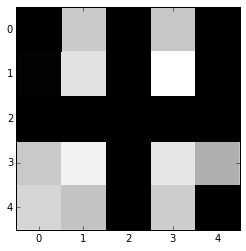

In [78]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

weights = network[0][4]
abs_weights = list(map(abs, weights))

grid = [abs_weights[row:(row + 5)] for row in range(0, 25, 5)]
ax = plt.gca()
ax.imshow(grid, cmap=matplotlib.cm.binary, interpolation='none')

def patch(x, y, color):
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1, color=color)


for i in range(5):
    for j in range(5):
        if weights[5 * i + j] < 0:
            ax.add_patch(patch(j, i, "white"))
            ax.add_patch(patch(j, i, "black"))

plt.show()